# Ames房價預測
* 資料來源: Kaggle ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))

### 【機器學習專案的流程】

#### 第一步：定義問題

* 問題目的: 先了解想要解決的是什麼問題? 
* 問題類型: 問題是屬於 $Regression$ 問題、 $classification$ ，還是 $clustering$ 問題，預測房價為多少即是一個 $Regression$ 問題

#### 第二步：蒐集及清理資料
* 蒐集資料: 針對所要解決問題定義所需的資料，並蒐集相關資料，資料蒐集來源除了現有的資料庫外，保存的電子檔、公開資料、外部網站、問卷調查..等，都是可用的資料來源。
* 初步分析: 對已收集到的資料，先進行簡單的初步整理，觀察每個特徵的意義，以初步的假設思考是否有助於預測
* 建立思考方向: 
    * 從預測值下手: 當房價變化時，哪些特徵有明顯的變化?  (正相關, 負相關, 無相關, 離群值)
    * 從特徵下手: 當某一個特徵變化時，哪些特徵亦有明顯的變化? 
* 清楚方向之後，針對特徵進行更進一步的篩選或是處理(例如: 排除無助於預測的特徵、離群值, 轉換類別數據, 特徵轉換)

#### 第三步：選擇及建立模型

* 選擇適當的迴歸模型: 
    * `Linear regression`: 最基礎的迴歸模型，適合作為一個 $base line$。
    * `Ridge regression`: 在`Linear regression`的損失函數上添加`L2`正則項，限制模型複雜度，賦予影響較大的特徵較高的權重係數，針對影響較小的特徵係數`收縮接近0`。
    * `Lasso regression`: 在`Linear regression`的損失函數上添加`L1`正則項，限制模型複雜度，將影響較少的特徵係數`收縮至0`，捨棄影響較少的特徵，進而達到特徵選擇的目的。
    * `SVM Regression`: 效率快速且適合作為 $base line$ 的 `linear svm`，以及其他的非線性`kernel`也是不錯的選擇。
    * `XGBoost`: 一個複雜且強大的演算法，可以用於分類也可以用來解決迴歸問題，近幾年由於這個演算法受到許多在機器學習競賽中獲獎團隊的青睞，因而受到了廣泛的歡迎和關注。
    
####  第四步：分析結果及修正模型

* 針對迴歸問題，經常使用的評價指標有
    * 平均方差 $mse$ `(mean_squared_error)`
    * 平均絕對誤差 $mae$ `(mean_absolute_error)`
    * 判定係數 $R^2$ `(R-squared)`

####  第五步：結果呈現 (進行預測)



## 1. Data overview



### 1.1 整理資料欄位 - 建立中文名欄位參考

參考網頁：

- https://chtseng.wordpress.com/2017/12/26/kaggle-house-price/


Data fields.<br/>
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class(建築類型)
* MSZoning: The general zoning classification(用地類型)
* LotFrontage: Linear feet of street connected to property(街道長度)
* LotArea: Lot size in square feet(土地面積)
* Street: Type of road access(街道鋪設類型)
* Alley: Type of alley access(巷弄鋪設類型)
* LotShape: General shape of property(物業形狀)
* LandContour: Flatness of the property(物業平坦度)
* Utilities: Type of utilities available(提供的水電設備)
* LotConfig: Lot configuration(空地設置)
* LandSlope: Slope of property(土地斜度)
* Neighborhood: Physical locations within Ames city limits(在市區位置)
* Condition1: Proximity to main road or railroad(類別-靠近主要公路條件)
* Condition2: Proximity to main road or railroad (if a second is present)(類別-靠近次要公道條件)
* BldgType: Type of dwelling(類別-住宅類型)
* HouseStyle: Style of dwelling(類別-住宅風格)
* OverallQual: Overall material and finish quality(建材品質)
* OverallCond: Overall condition rating(整體品質評分)
* YearBuilt: Original construction date(建設日期)
* YearRemodAdd: Remodel date(翻修日期)
* RoofStyle: Type of roof(屋頂類型)
* RoofMatl: Roof material(屋頂材質)
* Exterior1st: Exterior covering on house(房屋表面主要材質)
* Exterior2nd: Exterior covering on house (if more than one material)(房屋表面次要材質)
* MasVnrType: Masonry veneer type(屋內裝潢材質類型)
* MasVnrArea: Masonry veneer area in square feet(裝潢面積)
* ExterQual: Exterior material quality(外部材質品質)
* ExterCond: Present condition of the material on the exterior(外部材質現況)
* Foundation: Type of foundation(建材類型)
* BsmtQual: Height of the basement(地下層高度)
* BsmtCond: General condition of the basement(地下層狀況)
* BsmtExposure: Walkout or garden level basement walls(地下層對外通風品質)
* BsmtFinType1: Quality of basement finished area(地下層居住品質)
* BsmtFinSF1: Type 1 finished square feet(地下層第一處面積)
* BsmtFinType2: Quality of second finished area (if present)(地下層第二處生活品質)
* BsmtFinSF2: Type 2 finished square feet(地下層第二處面積)
* BsmtUnfSF: Unfinished square feet of basement area(未完成地下層面積)
* TotalBsmtSF: Total square feet of basement area(地下層總面積)
* Heating: Type of heating(暖氣類型)
* HeatingQC: Heating quality and condition(暖氣品質)
* CentralAir: Central air conditioning(是否有中央空調)
* Electrical: Electrical system(電機系統)
* 1stFlrSF: First Floor square feet(一樓面積)
* 2ndFlrSF: Second floor square feet(二樓面積)
* LowQualFinSF: Low quality finished square feet (all floors)(低品質所佔的樓層面積)
* GrLivArea: Above grade (ground) living area square feet(地面層生活面積)
* BsmtFullBath: Basement full bathrooms(地下層整間浴室)
* BsmtHalfBath: Basement half bathrooms(地下層半間浴室)
* FullBath: Full bathrooms above grade(地上層整間浴室)
* HalfBath: Half baths above grade(地上層半間浴室)
* Bedroom: Number of bedrooms above basement level(地上層房間數)
* Kitchen: Number of kitchens(廚房數)
* KitchenQual: Kitchen quality(廚房品質)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)(不含浴室地上房間數)
* Functional: Home functionality rating(房屋功能性評分)
* Fireplaces: Number of fireplaces(壁火爐數量)
* FireplaceQu: Fireplace quality(壁火爐品質)
* GarageType: Garage location(車庫在房屋位置)
* GarageYrBlt: Year garage was built(車庫建造年份)
* GarageFinish: Interior finish of the garage(車庫內裝潢完整度)
* GarageCars: Size of garage in car capacity(車庫內停車空間)
* GarageArea: Size of garage in square feet(車庫面積)
* GarageQual: Garage quality(車庫品質)
* GarageCond: Garage condition(車庫條件)
* PavedDrive: Paved driveway(車道鋪設材質)
* WoodDeckSF: Wood deck area in square feet(木製平台面積)
* OpenPorchSF: Open porch area in square feet(門廊面積)
* EnclosedPorch: Enclosed porch area in square feet(封閉式門廊面積)
* 3SsnPorch: Three season porch area in square feet(三季門廊面積)
* ScreenPorch: Screen porch area in square feet(screen porch面積)
* PoolArea: Pool area in square feet(泳池面積)
* PoolQC: Pool quality(泳池品質)
* Fence: Fence quality(柵欄品質)
* MiscFeature: Miscellaneous feature not covered in other categories(其它特徵)
* MiscVal: $Value of miscellaneous feature(其它特徵值)
* MoSold: Month Sold(賣出月份)
* YrSold: Year Sold(賣出年份)
* SaleType: Type of sale(賣出類型)
* SaleCondition: Condition of sale(賣出條件)

### 1.2 載入所需套件

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pylab import rcParams

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

plt.style.use('ggplot')
sns.set_style('whitegrid')

### 1.3 下載及讀取資料

In [ ]:
train_path = 'https://github.com/cloud-yun/ACCA/raw/main/ML-Kaggle%20house%20price%20prediction/data/train.csv'
test_path = 'https://github.com/cloud-yun/ACCA/raw/main/ML-Kaggle%20house%20price%20prediction/data/test.csv'

In [ ]:
# read data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print('Size of Training Set: ', train.shape[0], '筆資料', '，以及', train.shape[1], '特徵值')
print('Size of Testing Set: ', test.shape[0], '筆資料','，以及', test.shape[1], '特徵值')
print('Target Variable: SalePrice')

Size of Training Set:  1460 筆資料 ，以及 81 特徵值
Size of Testing Set:  1459 筆資料 ，以及 80 特徵值
Target Variable: SalePrice


### 1.4 了解資料

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
numerics_df = train.select_dtypes(include='number')
numerics_features = list(numerics_df.drop(columns=['Id', 'SalePrice']).columns)


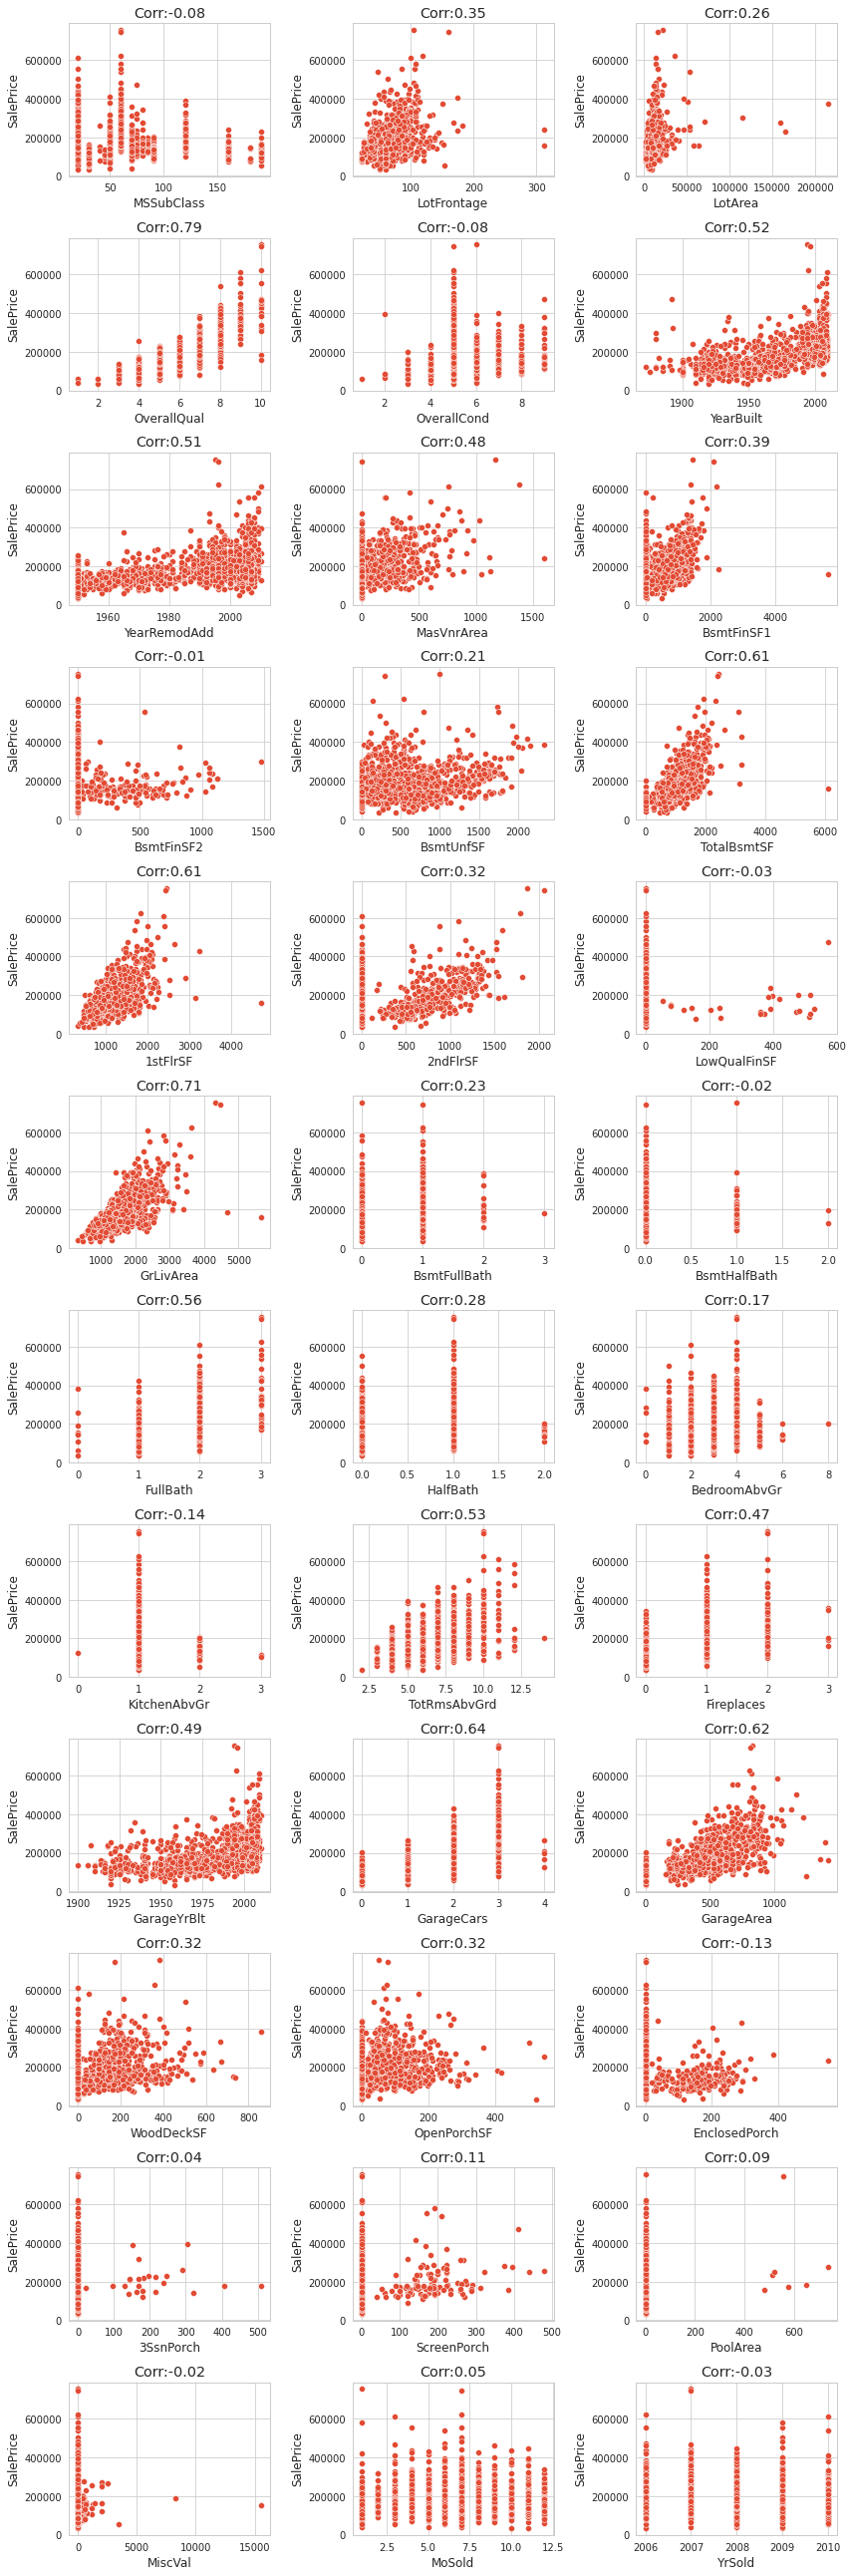

In [ ]:

plt.figure(figsize=(12, 36))

for i in range(36):
    plt.subplot(12, 3, i+1)
    plt.title('Corr:%.2f' % train[numerics_features[i]].corr(train['SalePrice']))
#    sns.regplot(x=numerics_features[i], y='SalePrice', data=train)
    sns.scatterplot(x=numerics_features[i], y='SalePrice', data=train)

plt.tight_layout()
plt.show() 

## 2. 資料清理及特徵工程

### 2.1 缺失值處理

缺失值的處理方式：
* 丟棄
* 補全
  * 依眾數
  * 依中位數
  * 依平均數
  * 依專家意見
* 轉換
  * 轉換前：性別（值域：男、女、空值或Null）。
  * 轉換後：性別 (值域：男、女、NA）。


#### 觀察缺失值欄位 - 訓練資料集

Text(0.5, 1.0, 'Missing Values Shares per Column(Zoom in)')

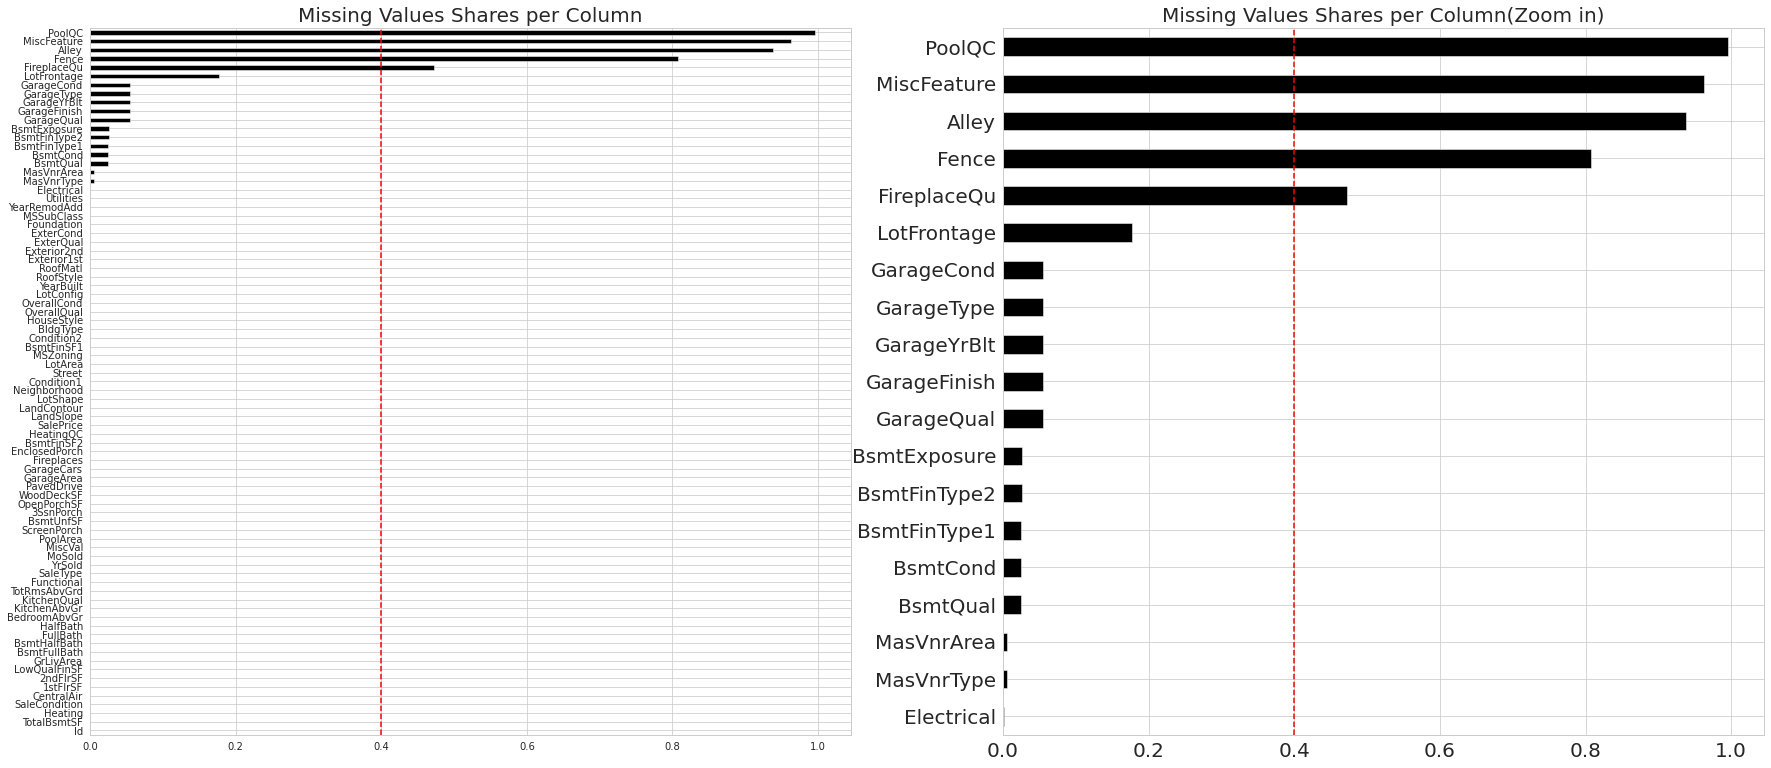

In [ ]:
fx, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,13))

train_na = train.isnull().mean().sort_values(ascending=True)
train_na_ = train_na[train_na > 0.]

#顯示全部欄位
train_na.plot.barh(color='black', ax=axes[0])
axes[0].axvline(x=0.4, color='r', linestyle='--')
axes[0].set_title('Missing Values Shares per Column', fontsize=20)

# Zoom in(只顯示部份的欄位)
train_na_.plot.barh(color='black', ax=axes[1], fontsize=20)
axes[1].axvline(x=0.4, color='r', linestyle='--')
axes[1].set_title('Missing Values Shares per Column(Zoom in)', fontsize=20)

#### 觀察缺失值欄位 - 測試資料集

Text(0.5, 1.0, 'Missing Values Shares per Column(Zoom in)')

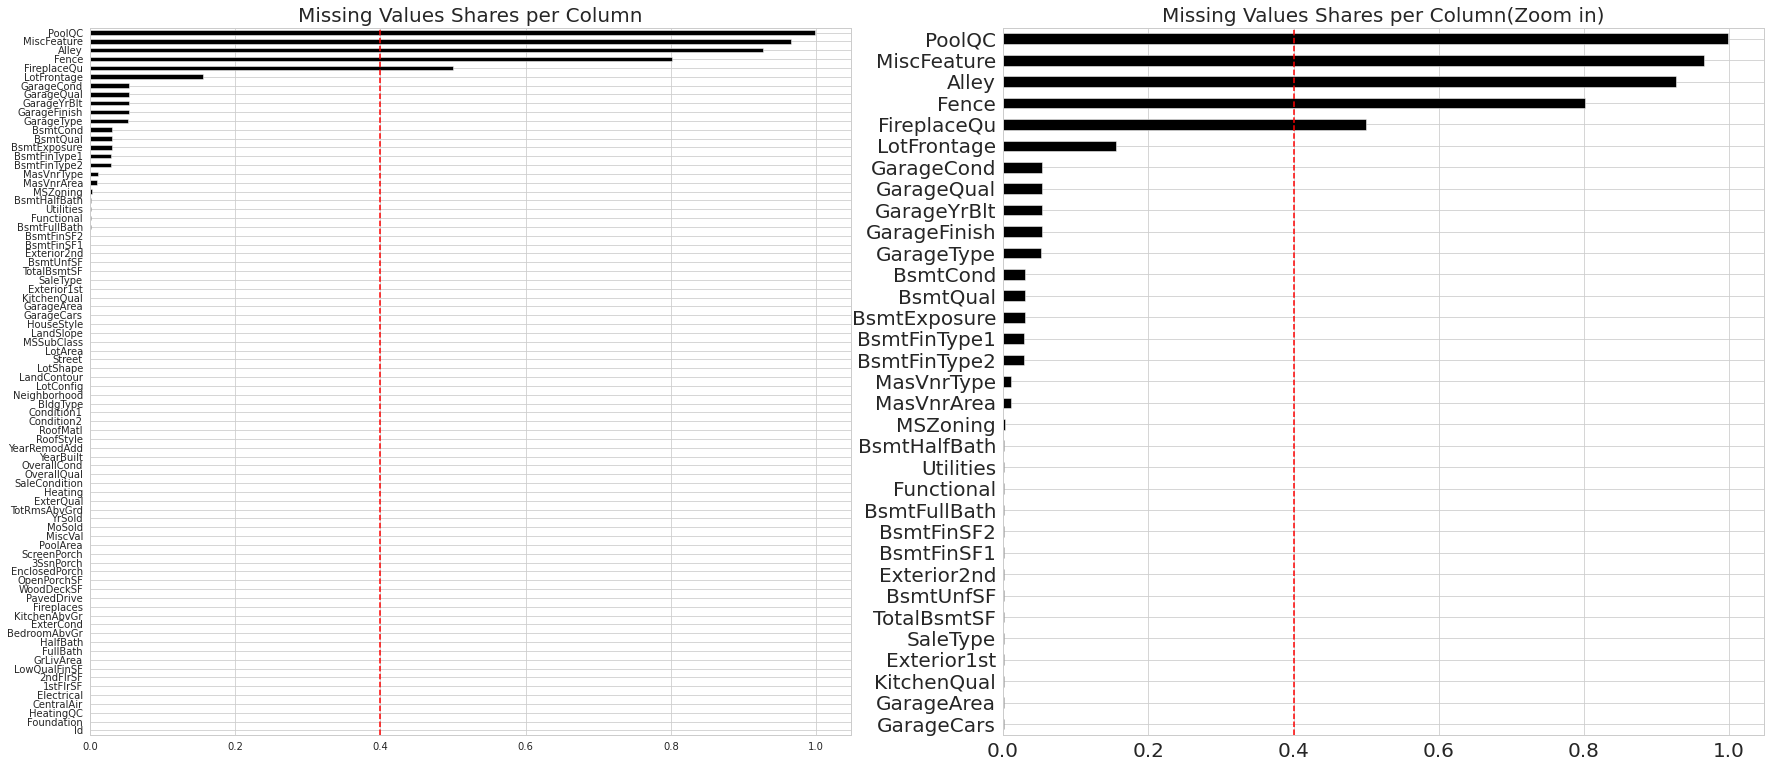

In [ ]:
fx, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,13))

test_na = test.isnull().mean().sort_values(ascending=True)
test_na_ = test_na[test_na > 0.]

#顯示全部欄位
test_na.plot.barh(color='black', ax=axes[0])
axes[0].axvline(x=0.4, color='r', linestyle='--')
axes[0].set_title('Missing Values Shares per Column', fontsize=20)

# Zoom in(只顯示部份的欄位)
test_na_.plot.barh(color='black', ax=axes[1], fontsize=20)
axes[1].axvline(x=0.4, color='r', linestyle='--')
axes[1].set_title('Missing Values Shares per Column(Zoom in)', fontsize=20)

#### 刪除缺失值欄位

觀察上圖得知，在訓練與測試資料集，有共同的欄位，都有非常高的缺失值比率，因此將這些欄位，同時從訓練與測試集中刪除。在此設定的比率為0.4。

In [ ]:
na_drop_rt = 0.4  # Cols with missing rate above the threshold are dropped.

na_cols = list(set(train_na[train_na > na_drop_rt].index.values).union(test_na[test_na > na_drop_rt].index.values))
print('Cols to be dropped in both train and test set:\n', na_cols)

Cols to be dropped in both train and test set:
 ['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu']


In [ ]:
train = train.drop(columns=na_cols)
test = test.drop(columns=na_cols)

#### 觀察剩餘要補值的欄位型態
可以看到，還需要補值的欄位，有數值型的，也有字串型的。

In [ ]:
cols = list(set(train.columns.values[train.isnull().any()]).union(test.columns.values[test.isnull().any()]))
train[cols].info(verbose=False)

print('\nNA cols remains: 10 numeric and 18 string cols.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 29 entries, SaleType to MSZoning
dtypes: float64(3), int64(8), object(18)
memory usage: 330.9+ KB

NA cols remains: 10 numeric and 18 string cols.


In [ ]:
num_cols = train[cols].select_dtypes(exclude='object').columns.values
cat_cols = train[cols].select_dtypes(include='object').columns.values

#### 觀察缺失值欄位的資料分佈

In [ ]:
# 訓練資料集 數值型欄位的資料分佈
train[cols].describe(exclude=['O'])

,BsmtFinSF1,MasVnrArea,BsmtUnfSF,BsmtFinSF2,BsmtFullBath,GarageArea,LotFrontage,TotalBsmtSF,GarageCars,GarageYrBlt,BsmtHalfBath
count,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1201.000,1460.000,1460.000,1379.000,1460.000
mean,443.640,103.685,567.240,46.549,0.425,472.980,70.050,1057.429,1.767,1978.506,0.058
std,456.098,181.066,441.867,161.319,0.519,213.805,24.285,438.705,0.747,24.690,0.239
min,0.000,0.000,0.000,0.000,0.000,0.000,21.000,0.000,0.000,1900.000,0.000
25%,0.000,0.000,223.000,0.000,0.000,334.500,59.000,795.750,1.000,1961.000,0.000
50%,383.500,0.000,477.500,0.000,0.000,480.000,69.000,991.500,2.000,1980.000,0.000
75%,712.250,166.000,808.000,0.000,1.000,576.000,80.000,1298.250,2.000,2002.000,0.000
max,5644.000,1600.000,2336.000,1474.000,3.000,1418.000,313.000,6110.000,4.000,2010.000,2.000


In [ ]:
# 訓練資料集-類別欄位的統計資訊（個數、種類、出現頻率最高的種類及其次數）
train[cols].describe(exclude=[np.number])

,SaleType,BsmtFinType2,Electrical,BsmtQual,MasVnrType,GarageCond,BsmtFinType1,GarageType,GarageFinish,Utilities,KitchenQual,GarageQual,Functional,BsmtExposure,BsmtCond,Exterior1st,Exterior2nd,MSZoning
count,1460,1422,1459,1423,1452,1379,1423,1379,1379,1460,1460,1379,1460,1422,1423,1460,1460,1460
unique,9,6,5,4,4,5,6,6,3,2,4,5,7,4,4,15,16,5
top,WD,Unf,SBrkr,TA,None,TA,Unf,Attchd,Unf,AllPub,TA,TA,Typ,No,TA,VinylSd,VinylSd,RL
freq,1267,1256,1334,649,864,1326,430,870,605,1459,735,1311,1360,953,1311,515,504,1151


In [ ]:
# 測試資料集 數值型欄位的資料分佈
test[cols].describe(exclude=['O'])

,BsmtFinSF1,MasVnrArea,BsmtUnfSF,BsmtFinSF2,BsmtFullBath,GarageArea,LotFrontage,TotalBsmtSF,GarageCars,GarageYrBlt,BsmtHalfBath
count,1458.000,1444.000,1458.000,1458.000,1457.000,1458.000,1232.000,1458.000,1458.000,1381.000,1457.000
mean,439.204,100.709,554.295,52.619,0.434,472.769,68.580,1046.118,1.766,1977.721,0.065
std,455.268,177.626,437.260,176.754,0.531,217.049,22.377,442.899,0.776,26.431,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,21.000,0.000,0.000,1895.000,0.000
25%,0.000,0.000,219.250,0.000,0.000,318.000,58.000,784.000,1.000,1959.000,0.000
50%,350.500,0.000,460.000,0.000,0.000,480.000,67.000,988.000,2.000,1979.000,0.000
75%,753.500,164.000,797.750,0.000,1.000,576.000,80.000,1305.000,2.000,2002.000,0.000
max,4010.000,1290.000,2140.000,1526.000,3.000,1488.000,200.000,5095.000,5.000,2207.000,2.000


In [ ]:
# 測試資料集-類別欄位的統計資訊（個數、種類、出現頻率最高的種類及其次數）
test[cols].describe(exclude=[np.number])

,SaleType,BsmtFinType2,Electrical,BsmtQual,MasVnrType,GarageCond,BsmtFinType1,GarageType,GarageFinish,Utilities,KitchenQual,GarageQual,Functional,BsmtExposure,BsmtCond,Exterior1st,Exterior2nd,MSZoning
count,1458,1417,1459,1415,1443,1381,1417,1383,1381,1457,1458,1381,1457,1415,1414,1458,1458,1455
unique,9,6,4,4,4,5,6,6,3,1,4,4,7,4,4,13,15,5
top,WD,Unf,SBrkr,TA,None,TA,GLQ,Attchd,Unf,AllPub,TA,TA,Typ,No,TA,VinylSd,VinylSd,RL
freq,1258,1237,1337,634,878,1328,431,853,625,1457,757,1293,1357,951,1295,510,510,1114


#### 對缺失值進行補值

* 如果類別欄位，有一個眾數出現次數高於1000的，就以此眾數為補值。
* 如果類別欄位的眾數，出現次數小於1000，那就直接以字串NA為替代值補入。
* 除了針對GarageYrBlt(車庫建造年份)是以1980年進行補值外，其它的數值型，都以0進行補值。

In [ ]:
def fill_nan(data):
    data_na_count = data.isnull().mean().sort_values(ascending=True)
    data_na = data_na_count[data_na_count > 0.]

    na_cols = data_na.index.values
    num_na_cols = data[na_cols].select_dtypes(exclude='object').columns.values
    cat_na_cols = data[na_cols].select_dtypes(include='object').columns.values

    if len(cat_na_cols) > 0:
        # 如果類別欄位，有一個眾數出現次數高於1000的，就以此眾數為補值
        data_mode = data[cat_na_cols].describe(exclude=[np.number])
        data_mode = data_mode.loc[['top','freq'],:].transpose()
        data_mode_dict = data_mode[data_mode.freq > 1000]['top'].to_dict()

        # 如果類別欄位的眾數，出現次數小於1000，那就直接以字串NA為替代值補入
        none_dict = {}
        for key in data_mode[data_mode.freq <= 1000].index.values:
            none_dict[key] = 'NA'

        none_dict

        # 合併高頻率眾數填補值和低頻率眾數填補值
        data_mode_dict.update(none_dict)

        data_mode_dict
    
        # 進行補值
        data.fillna(value=data_mode_dict, inplace=True)
    
    # 數值資料補值
    if len(num_na_cols) > 0:  
        # 車庫建造年份以中位數1980年進行補值
        data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value=1980)
        # 其餘數值欄位以0進行補值
        data[num_na_cols] = data[num_na_cols].fillna(value=0)
  
    return data

In [ ]:
# 呼叫函數進行缺失值補值
train = fill_nan(train)
test = fill_nan(test)

In [ ]:
# 檢查是否還有缺失值
print('Training set cols have missing values: ', sum(train.isnull().any()))
print('Testing set cols have missing values: ', sum(test.isnull().any()))

Training set cols have missing values:  0
Testing set cols have missing values:  0


### 2.2 極端值處理

#### 極端值對模型Fitting的影響

<img src="https://christophm.github.io/interpretable-ml-book/images/influential-point-1.png" width = "800" height = "600" alt="influential_point" align=center />

#### 使用散佈圖觀察

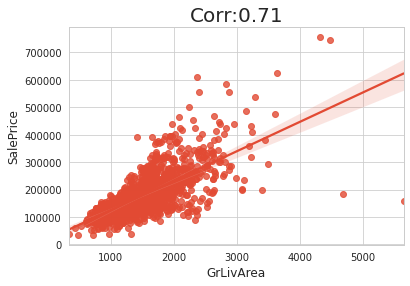

In [ ]:
fig, ax = plt.subplots()
pp = sns.regplot(data=train, x='GrLivArea', y='SalePrice')
_ = pp.set_title('Corr:%.2f' % np.corrcoef(train['SalePrice'],train['GrLivArea'])[0,1],size=20)

#### 去除掉極端值

> 可以使用studentized residuals: <br/>
  [studentized residuals介紹](https://online.stat.psu.edu/stat462/node/247/)<br/>
  通常如果studentized residuals的絕對值超過3，就會將此observation視為outlier

In [ ]:
# 使用statsmodels
import statsmodels.api as sm

X = train.copy()
X = X.select_dtypes(include=np.number)

Y = X.pop('SalePrice')

In [ ]:
# Fit model.
X2 = sm.add_constant(X)
lm = sm.OLS(Y, X2)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     177.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:35:00   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1424   BIC:                         3.490e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const              5e+05   1.41e+06      0.354      0.724   -2.27e+06    3.27e+06
Id               -0.9969      2.188     -0.456      0.649      -5.289       3.295
MSSubClass     -168.5575     26.761     -6.299      0.000    -221.052    -116.063
LotFrontage      20.8546     28.716      0.726      0.468     -35.476      77.185
LotArea           0.4084      0.101      4.049      0.000       0.211       0.606
OverallQual    1.723e+04   1192.026     14.458      0.000    1.49e+04    1.96e+04
OverallCond    4742.2086   1035.178      4.581      0.000    2711.570    6772.847
YearBuilt       265.7197     67.321      3.947      0.000     133.660     397.779
YearRemodAdd    131.2187     68.747      1.909      0.056      -3.637     266.075
MasVnrArea       31.0672      5.946      5.225      0.000      19.404      42.730
BsmtFinSF1        9.8471      2.531      3.891      0.000       4.883      14.812
BsmtFinSF2       -0.9837      4.510     -0.218      0.827      -9.830       7.863
BsmtUnfSF         0.1121      2.412      0.046      0.963      -4.619       4.843
TotalBsmtSF       8.9755      3.372      2.662      0.008       2.361      15.590
1stFlrSF         18.4593      6.209      2.973      0.003       6.280      30.639
2ndFlrSF         18.4641      5.731      3.222      0.001       7.222      29.706
LowQualFinSF     -6.9766     14.985     -0.466      0.642     -36.372      22.418
GrLivArea        29.9468      5.689      5.264      0.000      18.787      41.107
BsmtFullBath   9472.2969   2612.730      3.625      0.000    4347.084    1.46e+04
BsmtHalfBath   2181.5696   4093.079      0.533      0.594   -5847.543    1.02e+04
FullBath       3737.4993   2833.390      1.319      0.187   -1820.566    9295.565
HalfBath      -1710.9105   2665.452     -0.642      0.521   -6939.545    3517.724
BedroomAbvGr  -1.024e+04   1697.617     -6.033      0.000   -1.36e+04   -6911.030
KitchenAbvGr  -1.293e+04   5214.585     -2.479      0.013   -2.32e+04   -2697.107
TotRmsAbvGrd   4993.1759   1239.782      4.027      0.000    2561.180    7425.172
Fireplaces     4026.6884   1783.421      2.258      0.024     528.274    7525.103
GarageYrBlt     131.8550     69.013      1.911      0.056      -3.524     267.234
GarageCars     1.141e+04   2878.183      3.965      0.000    5766.930    1.71e+04
GarageArea       -5.6438      9.929     -0.568      0.570     -25.120      13.833
WoodDeckSF       24.8082      8.027      3.091      0.002       9.062      40.554
OpenPorchSF      -2.9215     15.191     -0.192      0.848     -32.720      26.877
EnclosedPorch    11.2857     16.864      0.669      0.503     -21.795      44.366
3SsnPorch        17.9054     31.412      0.570      0.569     -43.714      79.525
ScreenPorch      56.4731     17.192      3.285      0.001      22.749      90.198
PoolArea        -33.4223     23.761     -1.407   

In [ ]:
# result.get_influence() 會回傳一個OLSInfluence物件，裡面包含許多殘差資訊
influence = result.get_influence()
student_res = influence.resid_studentized_external

In [ ]:
student_res_idx = np.where(abs(student_res) > 3)[0]  # 回傳符合條件的index value

print(student_res[student_res_idx])

print('\nNumber of influencial points: {}'.format(len(student_res_idx)))

[  3.54357005   4.39786434   3.53841965 -10.76757241  -3.57978876
   3.79252651   8.10556917   3.5948514    3.03680904   6.64556644
   6.4957582    6.06750173   4.87401669   3.97612213   9.79993552
   3.48629745 -18.39029323  -3.86286031]

Number of influencial points: 18


In [ ]:
train = train.drop(index=student_res_idx)
train.reset_index(inplace=True, drop=True)

#### 重新觀察去除離群值的散佈圖

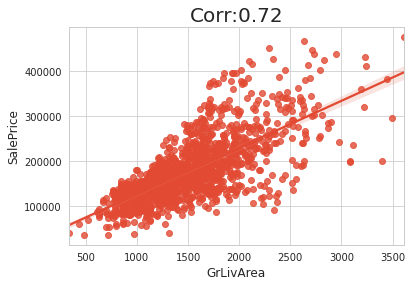

In [ ]:
fig, ax = plt.subplots()
pp = sns.regplot(data=train, x='GrLivArea', y='SalePrice')
_ = pp.set_title('Corr:%.2f' % np.corrcoef(train['SalePrice'],train['GrLivArea'])[0,1],size=20)

### 2.3 資料類型與特徵轉換

<img src="https://miro.medium.com/max/1071/1*SSHsD0yOIeAuRXBVLGKqSA.png" width = "647" height = "331" alt="influential_point" align=center />
<br>
圖片來源: <a href='https://medium.com/marketingdatascience/%E6%B7%BA%E8%AB%87%E8%B3%87%E6%96%99%E9%A1%9E%E5%9E%8B-%E7%A0%94%E7%A9%B6%E8%B3%87%E6%96%99-d9bb456c2fef'> 行銷資料科學, “淺談資料類型 </a>

#### 查看非數值型欄位，找出可用程度表示的欄位有哪些

In [ ]:
categorical = [col for col in train.columns if train[col].dtype == 'O']
for i in categorical:
    print(i,':',train[i].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sd

#### 針對有順序性的特徵欄位，進行OridinalEncode

In [ ]:
def oridinal_data_encode(data):
    
    data['MSSubClass'] = data['MSSubClass'].astype(str).map({'20':0,'30':1,'40':2,'45':3,'50':4,'60':5,'70':6,'75':7,'80':8,'85':9,'90':10,'120':11,'150':12,'160':13,'180':14,'190':15})
    
    # BsmtQual(地下層高度), BsmtCond(地下層狀況), GarageQual(車庫品質), GarageCond(車庫條件)
    # ExterQual(外部材質品質), ExterCond(外部材質狀況), HeatingQC(暖氣品質), KitchenQual(廚房品質)
    # 以Ex, Gd, TA, Fa, Po來表示高低之分, NA為缺失值
    ordi_cols_1 = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
                   'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
    for val in ordi_cols_1:
        data[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                       value=[0, 1, 2, 3, 4, 5],
                       inplace=True)
    
    # BsmtFinType1(地下層居住品質), BsmtFinType2(地下層第二處生活品質)
    # 以GLQ, ALQ, BLQ, Rec, LwQ, Unf來表示高低之分, NA為缺失值
    ordi_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
    for val in ordi_cols_2:
        data[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                       value=[0, 1, 2, 3, 4, 5, 6],
                       inplace=True)
        
    # BsmtExposure(地下層對外通風品質), 以Gd, Av, Mn, No來表示高低之分, NA為缺失值
    data['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                              value=[0, 1, 2, 3, 4],
                              inplace=True)

    # CentralAir(是否有中央空調), Y為有，N為無，NA為缺失值
    data['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                            value=[0, 1, 2],
                            inplace=True)

    # Functional(房屋功能性評分), 以Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal來表示高低之分, NA為缺失值
    data['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                            value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                            inplace=True)

    # GarageFinish(車庫內裝潢完整度), 以Fin, RFn, Unf來表示高低之分, NA為缺失值
    data['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                              value=[0, 1, 2, 3],
                              inplace=True)

    # LandSlope(土地斜度), 以Gtl, Mod, Sev來表示高低之分, NA為缺失值
    data['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                           value=[0, 1, 2, 3],
                           inplace=True)

    # LotShape(物業形狀), 以Reg, IR1, IR2, IR3來表示高低之分, NA為缺失值
    data['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                          value=[0, 1, 2, 3, 4],
                          inplace=True)

    # PacedDrive(車道鋪設材質), 以Y, P, N來表示高低之分, NA為缺失值
    data['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                            value=[0, 1, 2, 3],
                            inplace=True)

    # Street(街道鋪設類型), Pave為石塊路面, Grvl為碎石路面, NA為缺失值
    data['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                        value=[0, 1, 2],
                        inplace=True)
    return data

In [ ]:
train = oridinal_data_encode(train)
test = oridinal_data_encode(test)

#### 從數值型的欄位觀察，是否有不需要的欄位或是能夠互相整併的欄位。

* `YearBuilt`：建築施工日期。
* `YearRemodAdd`：建築整修日期，如果沒有整修就與`YearBuilt`一樣。
* `BsmtFinType1,BsmtFinType2`：皆為地下室竣工面積品質。
* `BsmtFinSF1,BsmtFinSF2`：皆為地下室竣工面積。
* `TotalBsmtSF,1stFlrSF,2ndFlrSF`：地下室總面積、一樓及二樓面積。
* `BsmtFullBath,BsmtHalfBath,FullBath,HalfBath`：地下室浴室數量,地面以上的浴室數量。
* `OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch`：皆是走廊的面積。
* `YrSold`：銷售年份，可以與上面的`YearBuilt`結合，得到房屋銷售時的屋齡。

In [ ]:
def numerical_proc(data):
    data['BsmtFinType'] = data['BsmtFinType1'] + data['BsmtFinType2']
    data['BsmtFinSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['Bath'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + data['FullBath'] + data['HalfBath']
    data['Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    data['BuildingAge'] = data['YrSold'] - data['YearBuilt']
    return data

In [ ]:
train = numerical_proc(train)
test = numerical_proc(test)

#### 目標變數轉換

觀察目標變數(target variable)的分佈
並且以log進行轉換，讓目標變數的分佈，比較趨近於常態分配

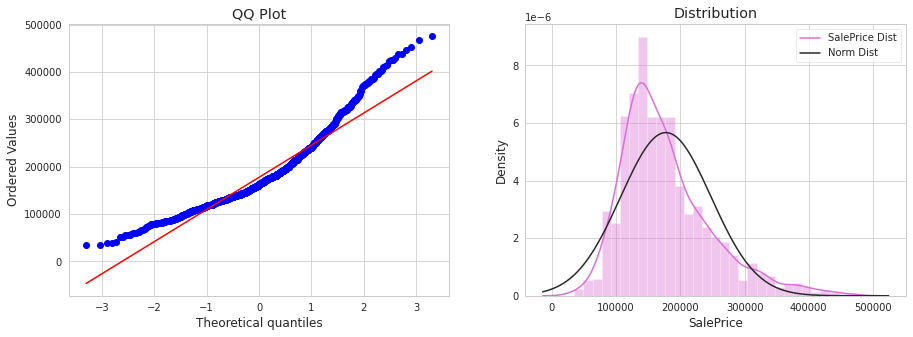

In [ ]:
from scipy import stats
from scipy.stats import norm

arr = train.SalePrice.copy()

# 繪製QQ plot and distribution plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = stats.probplot(arr, plot=ax[0])
_ = sns.distplot(arr,
                 color="orchid",
                 kde=True,
                 fit=norm,
                 ax=ax[1],
                 axlabel='SalePrice',
                 kde_kws={"label": "SalePrice Dist"},
                 fit_kws={"label": "Norm Dist"})

ax[1].legend(loc='best')
_ = ax[0].set_title('QQ Plot')
_ = ax[1].set_title('Distribution')

##### 針對目標變數，計算Skewness，並且進行轉換

**Skewness補充**
- Skewness 大於0代表右偏，小於0代表左偏
    - http://estat.ncku.edu.tw/topic/desc_stat/base/Skewness.html
    - 一般來說，偏度的絕對值超過0.5，意味著偏度非常大(https://kknews.cc/zh-tw/education/xjryo59.html)

In [ ]:
# 進行目標變數轉換
y_orig = train.SalePrice
y = np.log1p(train.SalePrice)

print('The skewness of transformed target variable: {:.3f}'.format(y.skew()))

The skewness of transformed target variable: -0.070


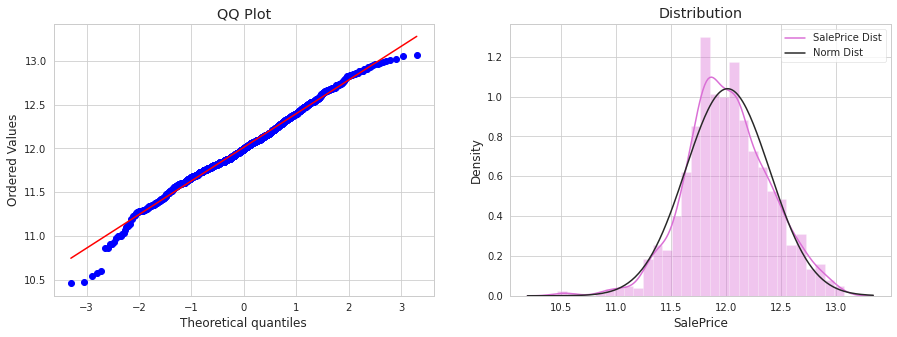

In [ ]:
from scipy import stats

arr = y.copy()

# 繪製QQ plot and distribution plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = stats.probplot(arr, plot=ax[0])
_ = sns.distplot(arr,
                 color="orchid",
                 kde=True,
                 fit=norm,
                 ax=ax[1],
                 axlabel='SalePrice',
                 kde_kws={"label": "SalePrice Dist"},
                 fit_kws={"label": "Norm Dist"})

ax[1].legend(loc='best')
_ = ax[0].set_title('QQ Plot')
_ = ax[1].set_title('Distribution')

#### 進行變數篩選

使用RandomForest來挑選重要的變數，進行降維來建模。

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = train.copy()
X.pop('SalePrice')
X = pd.get_dummies(X)
print("Number of unfiltered columns: ", X.shape)

rf = RandomForestRegressor(
    random_state=20,
    n_estimators=500,
    min_samples_leaf=0.01)

rf.fit(X, y)

Number of unfiltered columns:  (1442, 220)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [ ]:
# 製作feature importance的資料表
ft_ip = pd.Series(
    data=rf.feature_importances_,
    index=X.columns,
    name='feature_importance')

ft_ip = ft_ip.sort_values(ascending=False)
cum_sum = ft_ip.cumsum()
cum_sum.name = 'ft_ip_cumsum'
ft_ip = pd.concat([ft_ip, cum_sum], axis=1)

In [ ]:
# 篩選變數解釋佔比 < 0.9999
cols_idx = ft_ip[ft_ip['ft_ip_cumsum'] < 0.9999].index

In [ ]:
ft_ip.loc[cols_idx,:]

,feature_importance,ft_ip_cumsum
OverallQual,0.468,0.468
TotalSF,0.375,0.843
CentralAir,0.026,0.869
GarageCars,0.013,0.882
GarageArea,0.011,0.893
...,...,...
Exterior1st_Plywood,0.000,1.000
Condition1_Norm,0.000,1.000
Neighborhood_CollgCr,0.000,1.000
Neighborhood_Somerst,0.000,1.000


In [ ]:
# 搜集變數名稱
print('Length of cols(inflated by dummy variables): {}'.format(len(cols_idx)))
cols = [i.split('_')[0] for i in cols_idx.values]
cols = list(set(cols))
print('Lenght of unique cols: {}'.format(len(cols)))

Length of cols(inflated by dummy variables): 73
Lenght of unique cols: 60


##### 觀察經過篩選後的變數之間的相關性

In [ ]:
# cols: 經過RandomForest變數篩選後，要留下要使用的變數
select_cols = cols + ['SalePrice']

In [ ]:
# 下面計算在select_cols中，有多少個數值型欄位
train[select_cols].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Columns: 61 entries, Porch to SalePrice
dtypes: float64(3), int64(44), object(14)
memory usage: 687.3+ KB


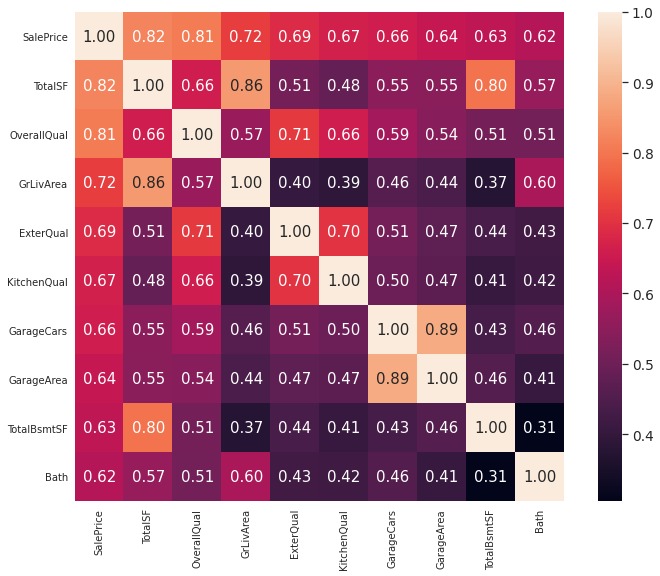

In [ ]:
#saleprice correlation matrix
f1, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
corrmat = train[select_cols].corr()
col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col.values, xticklabels=col.values)
plt.show()

In [ ]:
continuous = ['TotalSF', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
discrete = ['OverallQual', 'ExterQual', 'KitchenQual', 'GarageCars', 'Bath']

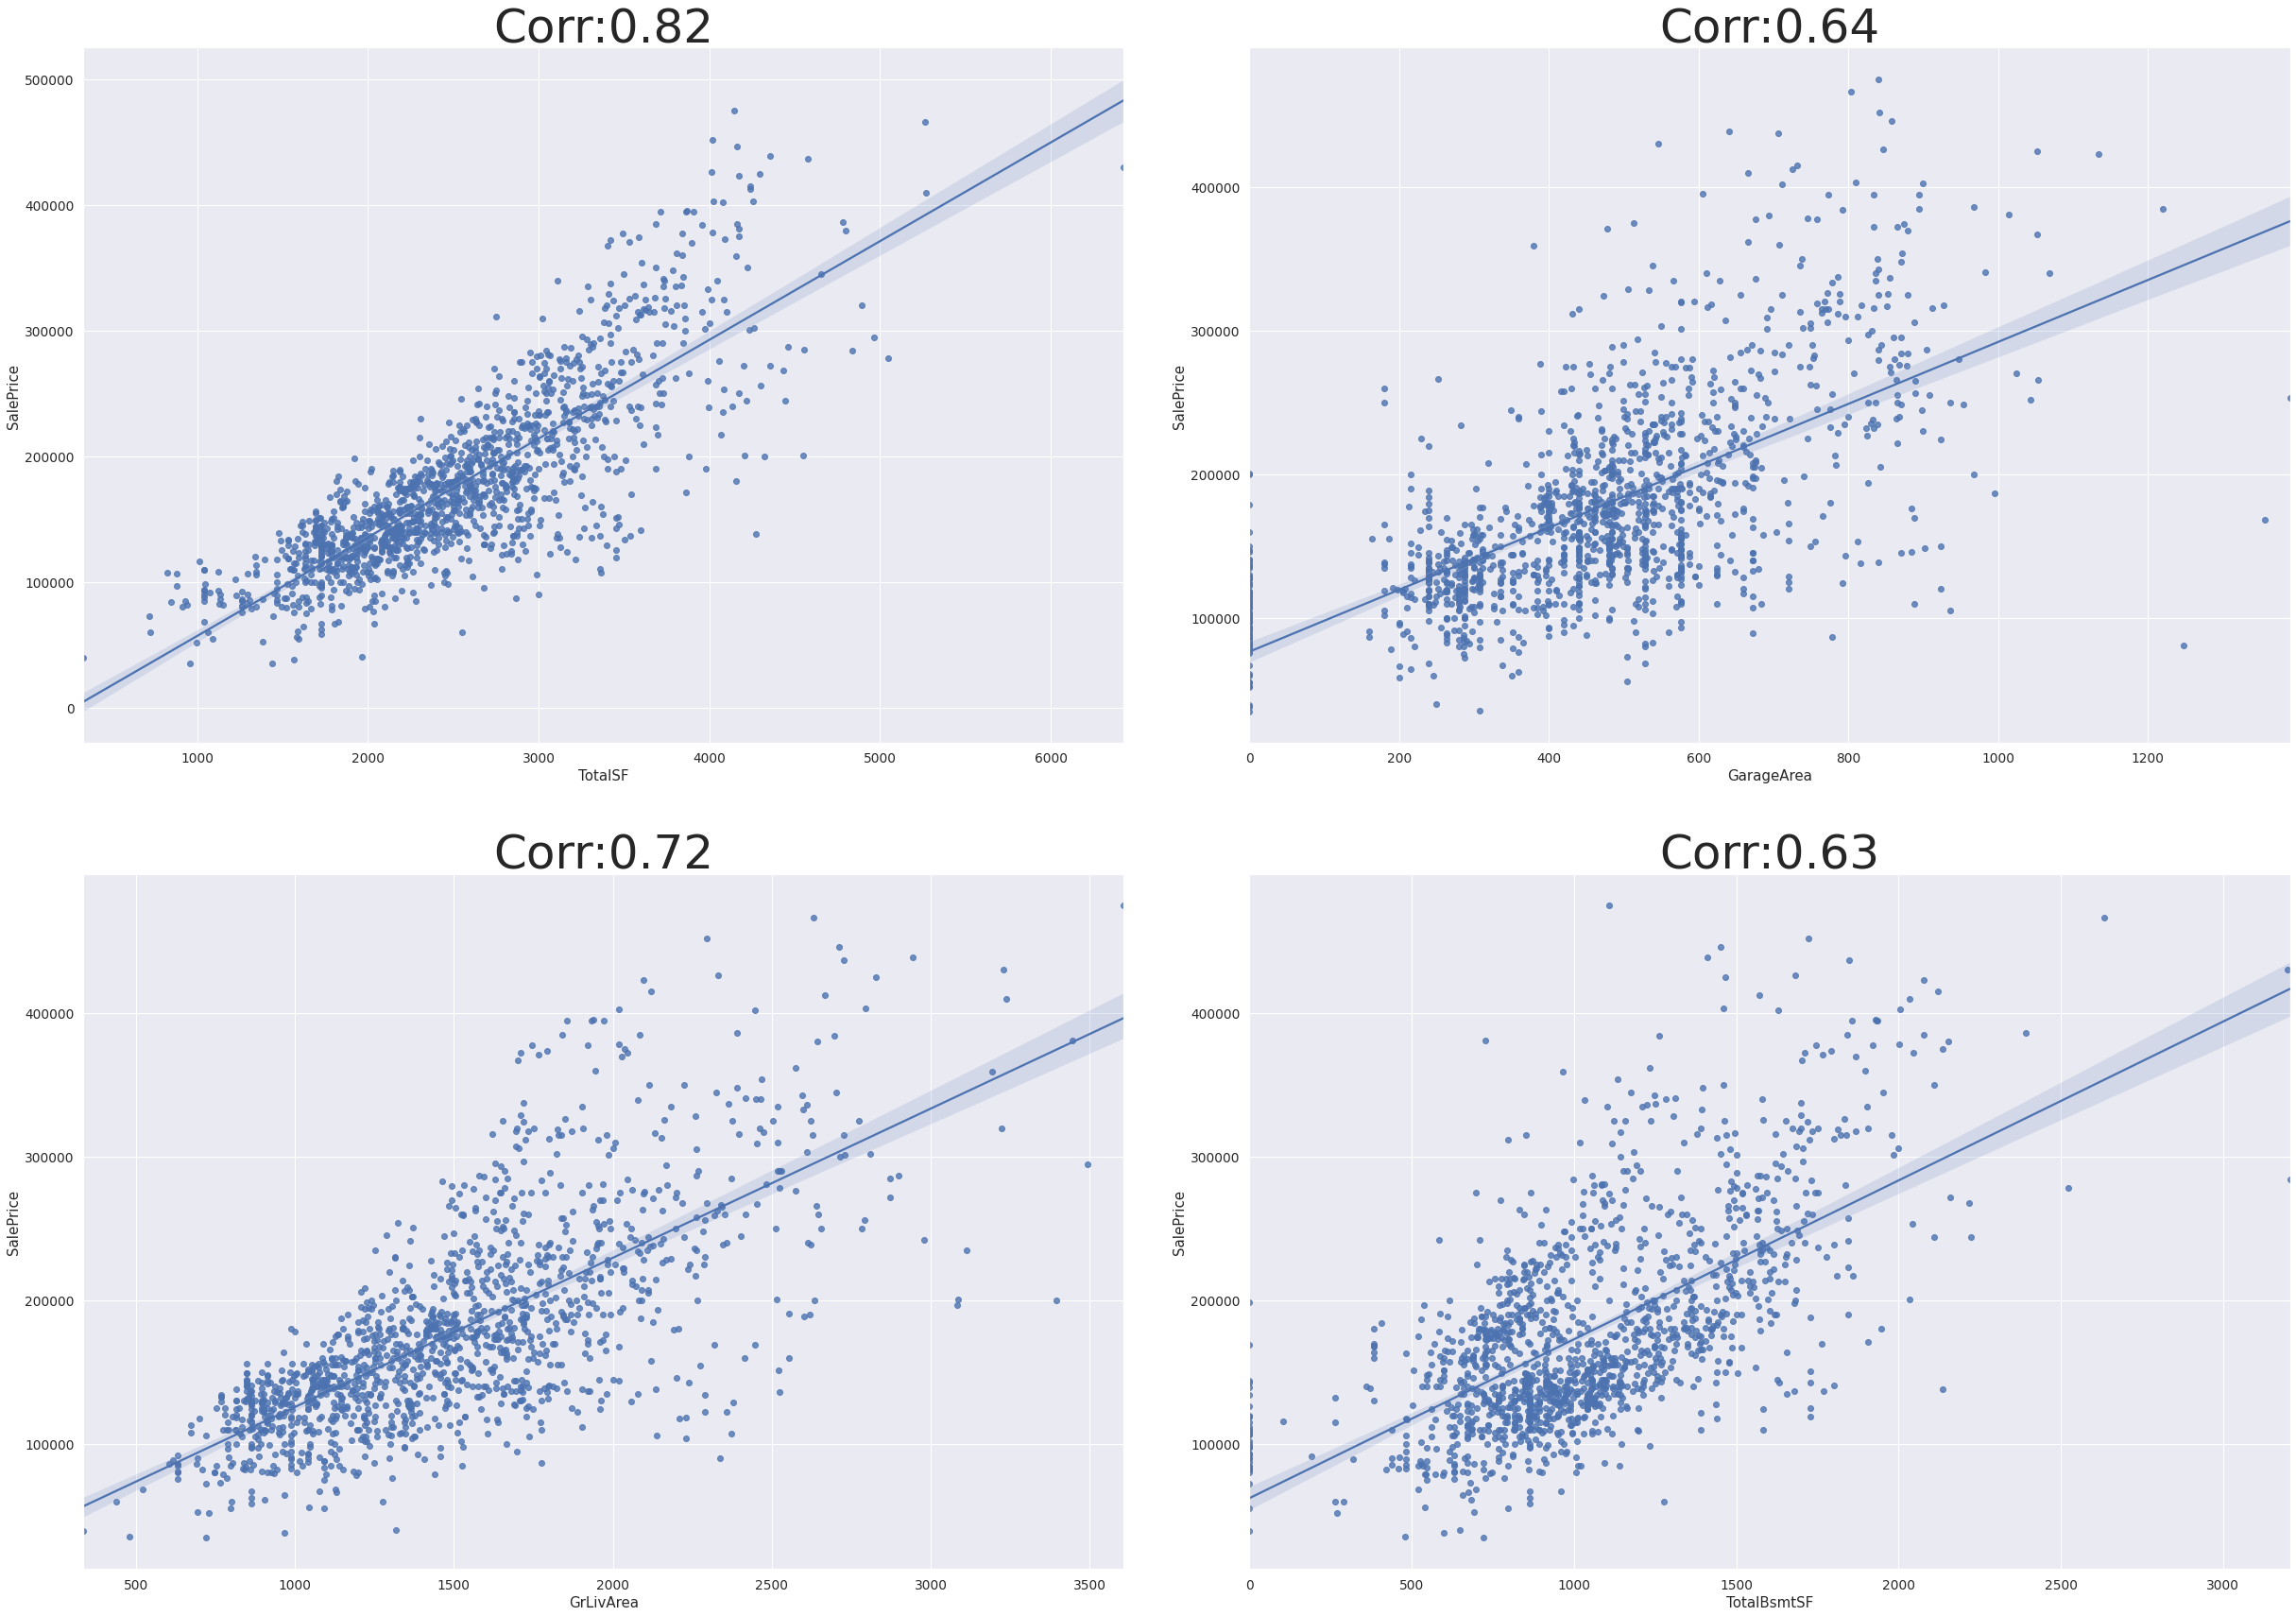

In [ ]:
rcParams['figure.figsize'] = (35, 25)
fig, axes = plt.subplots(2, 2)
sns.set(font_scale=4)
for i in range(len(continuous)):
    if i < 2:
        pp = sns.regplot(data=train, x=continuous[i], y='SalePrice', ax=axes[i,0])
        pp.set_title('Corr:%.2f' % np.corrcoef(train['SalePrice'], train[continuous[i]])[0,1],size=50)
    else:
        pp2 = sns.regplot(data=train, x=continuous[i], y='SalePrice', ax=axes[i-2,1])
        pp2.set_title('Corr:%.2f' % np.corrcoef(train['SalePrice'], train[continuous[i]])[0,1],size=50)
    plt.tight_layout()

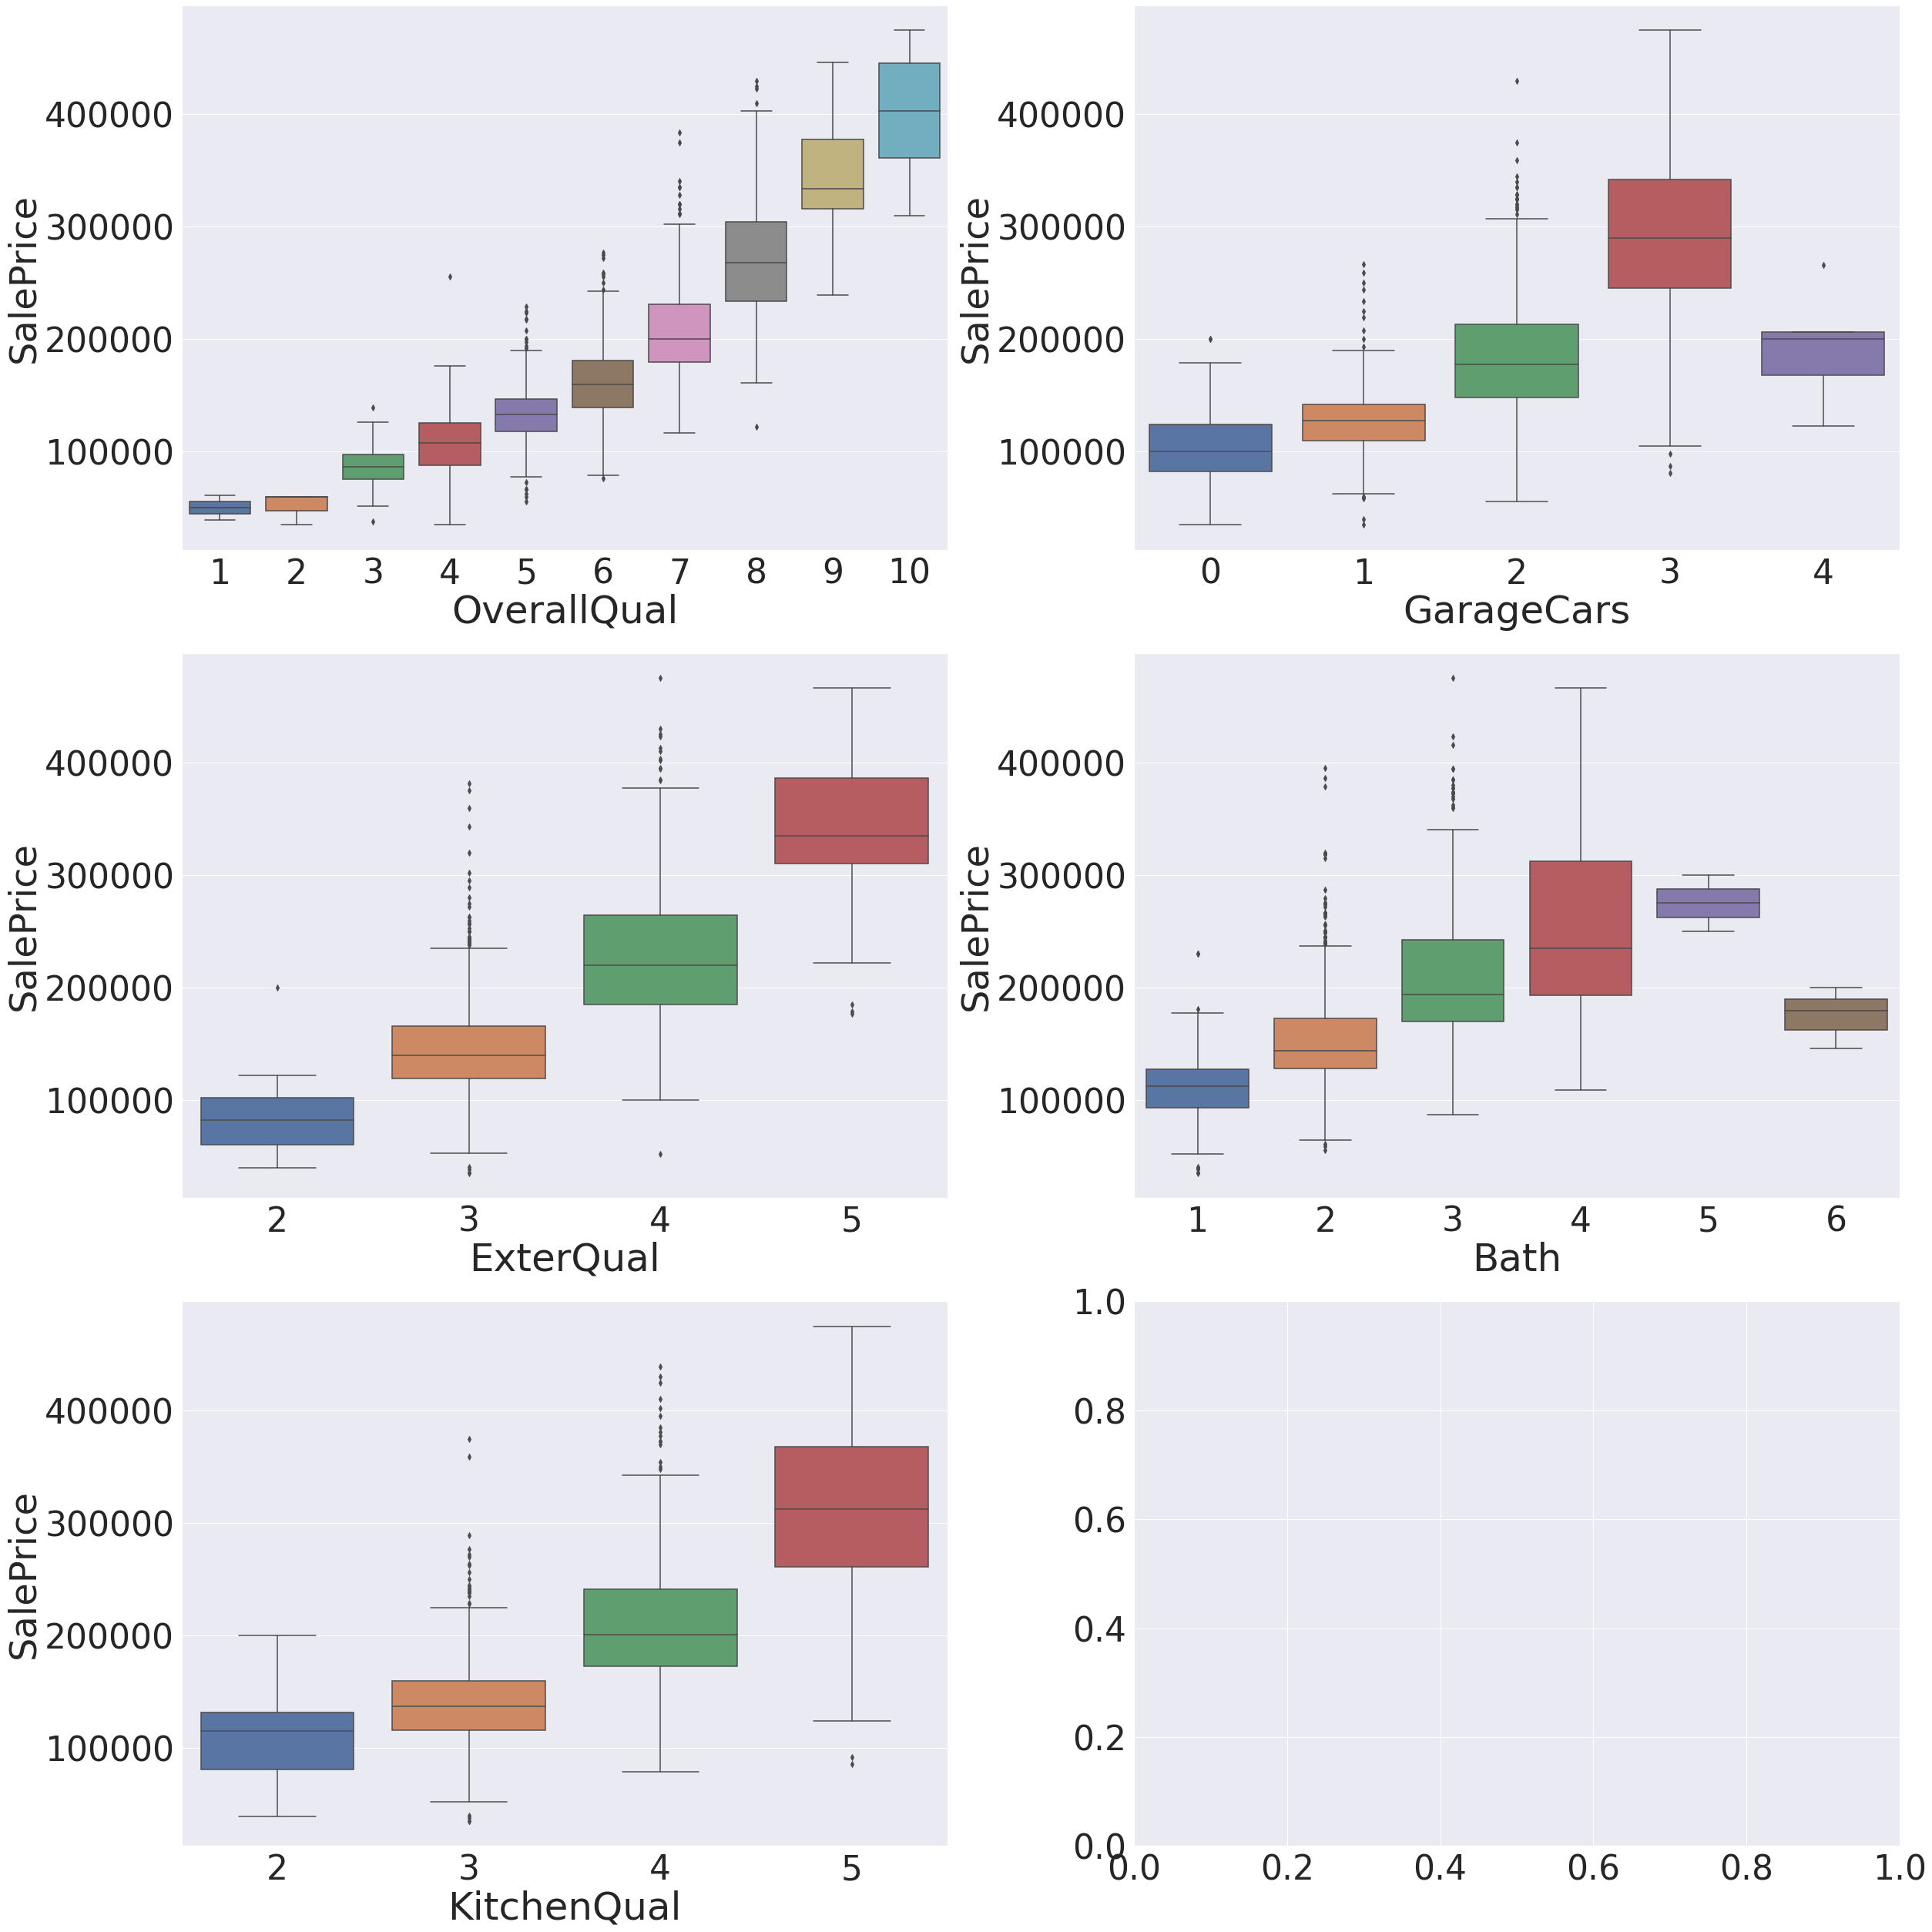

In [ ]:
sns.set(font_scale=4)
rcParams['figure.figsize'] = (35,35)
fig, axes = plt.subplots(3, 2)
sns.set(color_codes=True)
for i in range(len(discrete)):
    if i < 3:
        pp = sns.boxplot(data=train, x=discrete[i], y='SalePrice', ax=axes[i,0])
        pp.set_xlabel(discrete[i], fontsize=50)
    else:
        pp2 = sns.boxplot(data=train, x=discrete[i], y='SalePrice', ax=axes[i-3,1])
        pp2.set_xlabel(discrete[i], fontsize=50)
    plt.tight_layout()

#### 針對類別變數，進行OneHotEncode，針對數值變數，進行Rescaling

##### OneHotEncode

<img src="https://miro.medium.com/max/700/1*MWciJw4Kwx_kaBSl0AbsRQ.png" width = "650" alt="onhot_encode" align=center />
<br>
圖片來源: <a href='https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-4%E8%AC%9B-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-missing-data-one-hot-encoding-feature-scaling-3b70a7839b4a'> [資料分析&機器學習] 第2.4講：資料前處理 </a>

##### Feature Scaling
<img src="https://miro.medium.com/max/700/1*Ng4dEHk344oR_CD_yDy4cw.png" width = "480" alt="rescaling" align=center />
<br>
圖片來源: 吳恩達機器學習課程內的特徵縮放

In [ ]:
num_cols = train[cols].select_dtypes(include=np.number).columns.values
cat_cols = train[cols].select_dtypes(include='object').columns.values

In [ ]:
print('Categorical features for one-hot-encoding:\n')
cat_cols

Categorical features for one-hot-encoding:



array(['BldgType', 'SaleCondition', 'Electrical', 'MasVnrType',
       'Foundation', 'MSZoning', 'Neighborhood', 'Condition1',
       'GarageType', 'HouseStyle', 'RoofStyle', 'Exterior2nd',
       'Exterior1st', 'LotConfig'], dtype=object)

In [ ]:
print('Numerical features for rescaling:\n')
num_cols

Numerical features for rescaling:



array(['Porch', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearRemodAdd', 'Bath',
       'BsmtFinSF1', 'BsmtUnfSF', 'MasVnrArea', 'LotShape', 'MSSubClass',
       'BsmtQual', 'YearBuilt', 'BsmtFullBath', 'EnclosedPorch',
       '2ndFlrSF', 'BedroomAbvGr', 'GarageArea', 'BuildingAge',
       'BsmtFinSF', 'HeatingQC', 'OverallCond', 'BsmtFinType1',
       'HalfBath', 'GarageFinish', 'Fireplaces', 'PavedDrive',
       'GrLivArea', 'WoodDeckSF', 'TotalSF', 'MoSold', 'LotArea',
       'TotalBsmtSF', 'LotFrontage', 'OverallQual', 'BsmtExposure',
       'BsmtFinType', 'ExterQual', 'GarageCars', 'OpenPorchSF', 'Id',
       'GarageYrBlt', 'YrSold', 'CentralAir', 'FullBath', '1stFlrSF',
       'KitchenQual'], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', MinMaxScaler(), num_cols)],
    verbose=True)

In [ ]:
# Apply 在訓練資料集
X = preprocessor.fit_transform(train[cols])
X.shape

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s


(1442, 169)

In [ ]:
# Apply 在測試資料集
X_test = preprocessor.transform(test[cols])
X_test.shape

(1459, 169)

## 3. 選擇及建模作業

### 3.1 載入建模所需的套件

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import xgboost as xgb

### 3.2 切分訓練及驗證資料集
一般在訓練資料時，會保留0.1~0.3作為資料驗證用

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=71095, test_size=0.25)

### 3.3 挑選模型
以下先嘗試幾個模型架構，再從中挑選適合的模型，進一步調整參數
* Linear Regression
* Ridge Regression
* Lasso Regression
* SVR
* XGBoost ( Extreme Gradient Boosting )


In [ ]:
def rmse(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
    RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
    R2_score_train = metrics.r2_score(y_train, pred_train)
    R2_score_val = metrics.r2_score(y_val, pred_val)
    return RMSE_train, RMSE_val, R2_score_train, R2_score_val

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), SVR(), XGBRegressor(objective ='reg:squarederror')]

names = ['LR', 'Ridge', 'Lasso', 'SVR', 'XGB']
for name, model in zip(names, models):
    RMSE_train, RMSE_val, R2_score_train, R2_score_val = rmse(model, X_train, X_val, y_train, y_val)
    print(f'{name}:')
    print(f'　　Training RMSE: {RMSE_train:.4f},Training R2: {R2_score_train:.2f}, Validation RMSE: {RMSE_val:.4f}, Validation R2: {R2_score_val:.2f}')

LR:
　　Training RMSE: 0.0943,Training R2: 0.94, Validation RMSE: 0.1131, Validation R2: 0.91
Ridge:
　　Training RMSE: 0.0952,Training R2: 0.94, Validation RMSE: 0.1081, Validation R2: 0.92
Lasso:
　　Training RMSE: 0.3836,Training R2: 0.00, Validation RMSE: 0.3847, Validation R2: -0.00
SVR:
　　Training RMSE: 0.0783,Training R2: 0.96, Validation RMSE: 0.1210, Validation R2: 0.90
XGB:
　　Training RMSE: 0.0766,Training R2: 0.96, Validation RMSE: 0.1201, Validation R2: 0.90


## 4. 分析結果及進行修正

### 4.1 評估指標
<img src="https://pic1.xuehuaimg.com/proxy/csdn/https://cdn-images-1.medium.com/max/1600/1*pQR9id8CtnsdKljm8KODuw.png" width = "200" alt="RMSE" align=center />
<br>
<img src="https://miro.medium.com/max/700/1*JwEiZQSkL4I710994WaY4w.png" width = "320" alt="R_Squared" align=center />
<br>

### 4.2 XGBoost

#### 搜尋最佳參數

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import LinearSVR # LinearSVR與使用kernal為linear的SVR是等價的
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.base import clone

In [ ]:
# 使用scipy的統計分配函數
from scipy.stats import uniform, randint, expon, beta, betabinom

def fitGridModel(model, params, train_x, train_y):
    '''define a function to implement GridSearch all in one'''
    reg_model = clone(model)
    best_params = {}

    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    grid = RandomizedSearchCV(reg_model,
                              param_distributions=params,
                              scoring=scorer,
                              cv=5,
                              n_iter=10,
                              random_state=20,
                              verbose=3)
    grid.fit(train_x, train_y)
    score = np.sqrt(abs(grid.best_score_))  # root of mse
    print(
        "the best rmse of all model parameters' combination on model: {:.4f}".format(score))
    best_params.update(grid.best_params_)
    print("the parameter setting of optimized model:", grid.best_estimator_)

    return score, best_params, grid

In [ ]:
# XGBoost
xgb_score, xgb_params, xgb_grid_model = fitGridModel(xgb.XGBRegressor(),
                                                     params={
                                                         'objective': ['reg:squarederror'],
                                                         'learning_rate': beta(a=2, b=20, loc=0, scale=0.1),
                                                         'n_estimators': randint(low=2500, high=3500),
                                                         'gamma': beta(a=2,b=20, loc=0, scale=0.01),
                                                         'colsample_bytree': uniform(loc=0.6, scale=0.2),
                                                         'subsample': uniform(loc=0.6, scale=0.2),
                                                         'max_depth': [2, 3],
                                                         'min_child_weight': [0, 1, 2],
                                                         'reg_alphs': expon(loc=0, scale=0.01),
                                                         'seed': [27],
                                                         'scale_pos_weight': [1],
                                                         'reg_alpha': beta(a=2, b=20, loc=0, scale=0.0001)
                                                     },
                                                     train_x=X,
                                                     train_y=y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212, score=-0.012, total=  16.0s
[CV] colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s


[CV]  colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212, score=-0.014, total=  16.0s
[CV] colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.0s remaining:    0.0s


[CV]  colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212, score=-0.010, total=  16.0s
[CV] colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212 
[CV]  colsample_bytree=0.7176261602154548, gamma=0.00025736505540239395, learning_rate=0.005744824384957178, max_depth=3, min_child_weight=1, n_estimators=3275, objective=reg:squarederror, reg_alpha=1.2305234635366995e-05, reg_alphs=0.006434514849364796, scale_pos_weight=1, seed=27, subsample=0.6544102532530212, score=-0.010, total=  16.1s
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.8min finished


the best rmse of all model parameters' combination on model: 0.1060
the parameter setting of optimized model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6320949427985673,
             gamma=0.0005498509937947184, importance_type='gain',
             learning_rate=0.0107507780031133, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=None, n_estimators=3277, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=5.094279195627241e-06, reg_alphs=0.01076802722446994,
             reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
             subsample=0.6536581267350206, verbosity=1)


In [ ]:
xgb_params = {"base_score":0.5, "booster":'gbtree', "colsample_bylevel":1,
             "colsample_bynode":1, "colsample_bytree":0.6320949427985673,
             "gamma":0.0005498509937947184, "importance_type":'gain',
             "learning_rate":0.0107507780031133, "max_delta_step":0, "max_depth":3,
             "min_child_weight":1, "missing":None, "n_estimators":3277, "n_jobs":1,
             "nthread":None, "objective":'reg:squarederror', "random_state":0,
             "reg_alpha":5.094279195627241e-06, "reg_alphs":0.01076802722446994,
             "reg_lambda":1, "scale_pos_weight":1, "seed":27, "silent":None,
             "subsample":0.6536581267350206, "verbosity":1}

#### 訓練模型

In [ ]:
xgb_grid_model = xgb.XGBRegressor(**xgb_params)
xgb_grid_model.fit(X_train, y_train) #訓練模型

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6320949427985673,
             gamma=0.0005498509937947184, importance_type='gain',
             learning_rate=0.0107507780031133, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=3277, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=5.094279195627241e-06, reg_alphs=0.01076802722446994,
             reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
             subsample=0.6536581267350206, verbosity=1)

In [ ]:
RMSE_train, RMSE_val, R2_score_train, R2_score_val = rmse(xgb_grid_model, X_train, X_val, y_train, y_val)
print(f'　　Training RMSE: {RMSE_train:.4f},Training R2: {R2_score_train:.2f}, Validation RMSE: {RMSE_val:.4f}, Validation R2: {R2_score_val:.2f}')

　　Training RMSE: 0.0388,Training R2: 0.99, Validation RMSE: 0.1241, Validation R2: 0.90


## 5. 進行預測

In [ ]:
# 使用模型進行預測
y_pred = xgb_grid_model.predict(X_test)

In [ ]:
# 因為前面為了讓SalePricelog趨近於常態分配, 進行了log轉換，故需要再轉換回實際價格
y_pred_real = np.expm1(y_pred)
y_pred_real

array([123395.95, 158862.78, 185087.9 , ..., 160512.23, 120464.95,
       207640.53], dtype=float32)